## Imports 

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Loading the data and rename the columns to match the documentation

In [ ]:
#load data/moviesummaries/character.metadata.tsv
character_metadata = pd.read_csv('../data/moviesummaries/character.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/plot_summaries.txt
plot_summaries = pd.read_csv('../data/moviesummaries/plot_summaries.txt', sep='\t', header=None)

#load data/moviesummaries/movie.metadata.tsv
movie_metadata = pd.read_csv('../data/moviesummaries/movie.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/name.clusters.txt
name_clusters = pd.read_csv('../data/moviesummaries/name.clusters.txt', sep='\t', header=None)


In [ ]:
#rename columns to match documentation 

character_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", 
                              "Actor height", "Actor ethnicity", "Actor name", "Actor age", "Freebase character/actor map ID", 
                              "Freebase character ID", "Freebase actor ID"]

character_metadata.head()

In [ ]:
#rename columns to match documentation

plot_summaries.columns = ["Wikipedia movie ID", "Summary"]

plot_summaries.head()

In [ ]:
#rename columns to match documentation

movie_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie revenue", "Movie runtime",
                          "Movie languages", "Movie countries", "Movie genres"]

movie_metadata.head()

In [ ]:
# rename columns to match documentation

name_clusters.columns = ["Character name", "Freebase character/actor map ID"]

name_clusters.head()

## Merging of the tables

In [ ]:
# Merging character_metadata and movie_metadata on Wikipedia movie ID

character_movie = pd.merge(character_metadata, movie_metadata, on='Wikipedia movie ID', how='outer') #The outer join yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate.
character_movie.head()
are_columns_equal = (character_movie['Freebase movie ID_x'] == character_movie['Freebase movie ID_y']).all()
character_movie.head()

This merge might not be usefull +doubles the columns of ID and release ...

In [ ]:
#merging movie_metadata and plot_summaries on Wikipedia movie ID

movie_plot = pd.merge(movie_metadata, plot_summaries, on='Wikipedia movie ID', how='outer')
movie_plot.head()

If we want to use this merged data for the rest of the analysis we need to change the code bellow -> see with the others

## Data completeness

In [ ]:
# check the number and percentage of null values in each column of character_metadata as well as the number of different values in each column. Show the results in a single dataframe.

character_metadata_null = pd.DataFrame(character_metadata.isnull().sum(), columns=['Number of null values'])
character_metadata_null['Percentage of null values'] = character_metadata_null['Number of null values'] / len(character_metadata)
character_metadata_null['Number of unique values'] = character_metadata.nunique()

character_metadata_null

The character name, etnhicity and heigh have a high percentage of missing values. 

In [ ]:
# check the number and percentage of null values in each column of plot_summaries as well as the number of different values in each column. Show the results in a single dataframe.

plot_summaries_null = pd.DataFrame(plot_summaries.isnull().sum(), columns=['Number of null values'])
plot_summaries_null['Percentage of null values'] = plot_summaries_null['Number of null values'] / len(plot_summaries)
plot_summaries_null['Number of unique values'] = plot_summaries.nunique()

plot_summaries_null

In [ ]:
# show summary duplicates

plot_summaries[plot_summaries.duplicated(subset=['Summary'])]

In [ ]:
# check the number and percentage of null values in each column of movie_metadata as well as the number of different values in each column. Show the results in a single dataframe.

movie_metadata_null = pd.DataFrame(movie_metadata.isnull().sum(), columns=['Number of null values'])
movie_metadata_null['Percentage of null values'] = movie_metadata_null['Number of null values'] / len(movie_metadata)
movie_metadata_null['Number of unique values'] = movie_metadata.nunique()

movie_metadata_null

We can see that around 90% of data for the movie revenue are missing. Since this informations might be usefull for the rest of the project, we might need to consider ways of enriching the data ?


In [ ]:
# check the number and percentage of null values in each column of name_clusters as well as the number of different values in each column. Show the results in a single dataframe.

name_clusters_null = pd.DataFrame(name_clusters.isnull().sum(), columns=['Number of null values'])
name_clusters_null['Percentage of null values'] = name_clusters_null['Number of null values'] / len(name_clusters)
name_clusters_null['Number of unique values'] = name_clusters.nunique()

name_clusters_null

## Relationship between datasets

In [ ]:
# create a graph with four nodes, each representing a dataframe using networkx to model the dataframe's relationships

G = nx.Graph()

# add the four nodes to the graph (character_metadata, plot_summaries, movie_metadata, name_clusters)
nodes = ["character_metadata", "plot_summaries", "movie_metadata", "name_clusters"]

G.add_nodes_from(nodes)

# add edges to the graph to represent the relationships between the dataframes

G.add_edges_from([("character_metadata", "plot_summaries"), ("character_metadata", "movie_metadata"), ("character_metadata", "name_clusters"),
                  ("plot_summaries", "movie_metadata")])

# add labels to the edges

G.edges["character_metadata", "plot_summaries"]['label'] = "Wikipedia movie ID"
G.edges["character_metadata", "movie_metadata"]['label'] = "Wikipedia movie ID\nFreebase movie ID\nMovie release date"
G.edges["character_metadata", "name_clusters"]['label'] = "Character name\nFreebase character/actor map ID"
G.edges["plot_summaries", "movie_metadata"]['label'] = "Wikipedia movie ID" 

# plot the graph with edge labels

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
plt.show()

#### character_metadata -> movie_metadata

In [ ]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of movie_metadata

character_metadata['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

In [ ]:
# check if each value of the column Freebase movie ID of character_metadata appears in the column Freebase movie ID of movie_metadata

character_metadata['Freebase movie ID'].isin(movie_metadata['Freebase movie ID']).value_counts()

In [ ]:
# check if each value of the column Movie release date of character_metadata appears in the column Movie release date of movie_metadata

character_metadata['Movie release date'].isin(movie_metadata['Movie release date']).value_counts()

#### movie_metadata -> character_metadata

In [ ]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of character_metadata

movie_metadata['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

In [ ]:
# check if each value of the column Freebase movie ID of movie_metadata appears in the column Freebase movie ID of character_metadata

movie_metadata['Freebase movie ID'].isin(character_metadata['Freebase movie ID']).value_counts()

In [ ]:
# check if each value of the column Movie release date of movie_metadata appears in the column Movie release date of character_metadata

movie_metadata['Movie release date'].isin(character_metadata['Movie release date']).value_counts()

#### character_metadata -> name_cluster

In [ ]:
# check if each value of the column Character name of character_metadata appears in the column Character name of name_clusters

character_metadata['Character name'].isin(name_clusters['Character name']).value_counts()

In [ ]:
# check if each value of the column Freebase character/actor map ID of character_metadata appears in the column Freebase character/actor map ID of name_clusters

character_metadata['Freebase character/actor map ID'].isin(name_clusters['Freebase character/actor map ID']).value_counts()

#### name_cluster -> character_metadata

In [ ]:
# check if each value of the column Character name of name_clusters appears in the column Character name of character_metadata

name_clusters['Character name'].isin(character_metadata['Character name']).value_counts()

In [ ]:
# check if each value of the column Freebase character/actor map ID of name_clusters appears in the column Freebase character/actor map ID of character_metadata

name_clusters['Freebase character/actor map ID'].isin(character_metadata['Freebase character/actor map ID']).value_counts()

#### character_metadata -> plot_summaries

In [ ]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of plot_summaries

character_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

#### plot_summaries -> character_metadata

In [ ]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of character_metadata

plot_summaries['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

#### movie_metadata -> plot_summaries

In [ ]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of plot_summaries

movie_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

#### plot_summaries -> movie_metadata

In [ ]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of movie_metadata

plot_summaries['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

## Distribution

Let's visualize the amount of film produced by the top 10 country

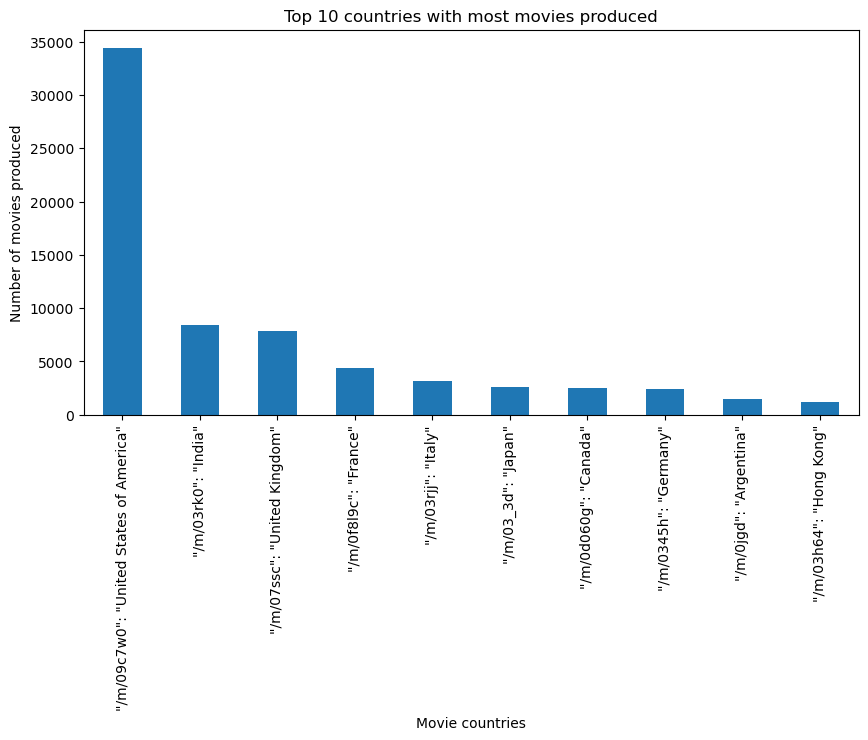

In [245]:
# Converting the dictionnary structure to a list, and renaming the col
country_list = pd.DataFrame(movie_metadata['Movie countries'].tolist())
country_list.rename(columns={0: 'Movie countries'}, inplace=True)

# Since some movie are coproduced by several countries, we seperate them into different rows. 
# This way, a film produced by two countries will account for +1 production for each country

country_list = country_list['Movie countries'].str.split(', ', expand=True)

# Droping NAN and converting to a Dataframe
country_stacked = country_list.stack().dropna().rename('Movie countries')

country_stacked = pd.DataFrame(country_stacked)

# Drop rows where 'Movie countries' is an empty string '{}'
country_stacked = country_stacked[country_stacked['Movie countries'] != '{}']
country_stacked = country_stacked['Movie countries'].str.replace("{", "")
country_stacked = pd.DataFrame(country_stacked)
country_stacked = country_stacked['Movie countries'].str.replace("}", "")

# Counting the number of movies produced by country
country_stacked = pd.DataFrame(country_stacked)
country_count = country_stacked.groupby(['Movie countries']).size()
country_count.head()


# Plotting top 10 countries with most movies produced
country_count.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), title='Top 10 countries with most movies produced')
plt.ylabel('Number of movies produced')
plt.show()



We can see that a large number of film are profuced by USA, followed by India and United Kingdom. We can analyzing the percentage of film they produced or coproduced.

In [242]:
# Percentage of movies produced by USA and India

# Sorting the values in descending order
country_sorted = country_count.sort_values(ascending=False)

# Printing the percentage of movies produced by USA and India
print('Percentage of movies produced by USA: ', country_sorted[0].sum() / country_count.sum() * 100, '%')
print('Percentage of movies produced by India: ', country_sorted[1].sum() / country_count.sum() * 100, '%')
print('Percentage of movies produced by UK : ', country_sorted[2].sum() / country_count.sum() * 100, '%')

Percentage of movies produced by USA:  39.80610604009764 %
Percentage of movies produced by India:  9.730561436388667 %
Percentage of movies produced by UK :  9.102372771549879 %


Let's visualize the top 10 genre

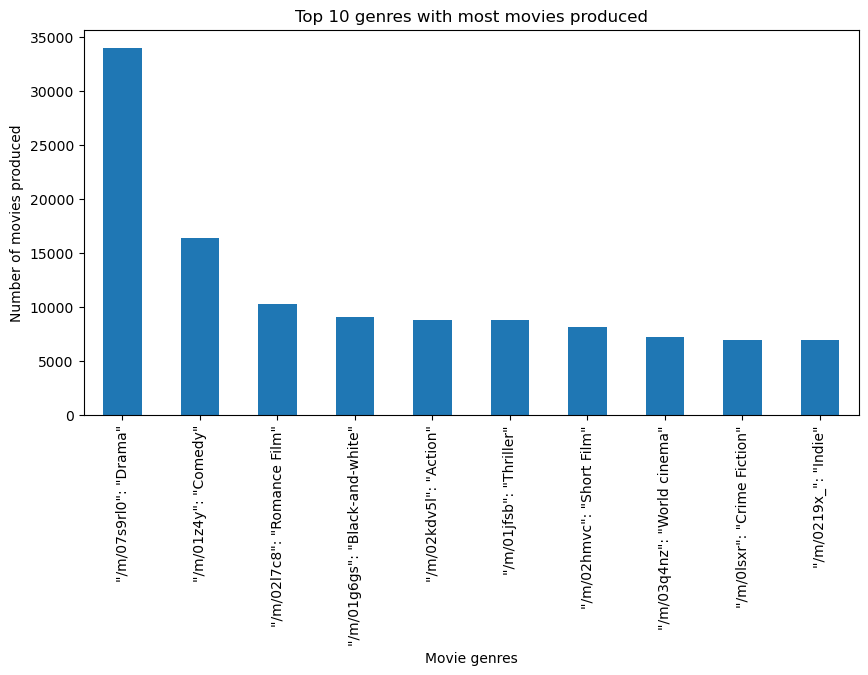

In [244]:
# Converting the dictionnary structure to a list, and renaming the col
genre_list = pd.DataFrame(movie_metadata['Movie genres'].tolist())
genre_list.rename(columns={0: 'Movie genres'}, inplace=True)

# Since some movie are coproduced by several countries, we seperate them into different rows. 
# This way, a film produced by two countries will account for +1 production for each genre

genre_list = genre_list['Movie genres'].str.split(', ', expand=True)

# Droping NAN and converting to a Dataframe
genre_stacked = genre_list.stack().dropna().rename('Movie genres')

genre_stacked = pd.DataFrame(genre_stacked)

# Drop rows where 'Movie countries' is an empty string '{}'
genre_stacked = genre_stacked[genre_stacked['Movie genres'] != '{}']
genre_stacked = genre_stacked['Movie genres'].str.replace("{", "")
genre_stacked = pd.DataFrame(genre_stacked)
genre_stacked = genre_stacked['Movie genres'].str.replace("}", "")

# Counting the number of movies produced by genre
genre_stacked = pd.DataFrame(genre_stacked)
genre_count = genre_stacked.groupby(['Movie genres']).size()
genre_count.head()


# Plotting top 10 countries with most movies produced
genre_count.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), title='Top 10 genres with most movies produced')
plt.ylabel('Number of movies produced')
plt.show()


In [246]:
# Percentage of movies produced by USA and India

# Sorting the values in descending order
genre_sorted = genre_count.sort_values(ascending=False)

# Printing the percentage of movies produced by USA and India
print('Percentage of drama produced : ', genre_sorted[0].sum() / genre_count.sum() * 100, '%')
print('Percentage of comedy produced : ', genre_sorted[1].sum() / genre_count.sum() * 100, '%')
print('Percentage of romance produced : ', genre_sorted[2].sum() / genre_count.sum() * 100, '%')

Percentage of drama produced :  13.975728334888155 %
Percentage of comedy produced :  6.718886774695989 %
Percentage of romance produced :  4.205828322970135 %
